# Previsão de Churn

### Discente(s):

    Bruno Antonio dos Santos Bezerra
    Erick Vinicius Rebouças Cruz
    Gabriel Monteiro Silva

### Framework:
    TensorFlow/Keras

### Requerimentos:
    1. Python 3.9
    2. Tensorflow (conda install -c conda-forge tensorflow-gpu=2.10)
    3. Pandas
    4. Matplotlib
    5. Sklearn
    6. Numpy
    7. Dataset: https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services

### Etapas do Projeto:
    1. Importação de bibliotecas e dados
    2. Análise dos dados
    3. Pré-processamento dos dados
    4. Otimização de hiperparâmetros com optuna - (Arquivos Separados)
    5. Modelos
        5.1 MLP
        5.2 Random Forest
        5.3 Gradient Boost
        5.4 Transformers (STab)
        5.5 KAN (Kolmogorov Arnold Networks)
        5.6 KAN Transformer (TabANet)
    6. Análise dos melhores modelos encontrados - (AUC-ROC, KS, Matriz de confusão, Recall, Precision, F-Measure, MSE)

# 1. Importação de bibliotecas e dados

In [1]:
# === Manipulação de dados ===
import numpy as np  # Manipulação de arrays e operações numéricas.
import pandas as pd  # Manipulação e análise de dados em tabelas (DataFrames).

# === Visualização de dados ===
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações básicas.
import seaborn as sns  # Visualizações estatísticas mais elaboradas e bonitas.

# === Pré-processamento ===
from sklearn.preprocessing import StandardScaler  # Padronização de variáveis numéricas.
from sklearn.preprocessing import OneHotEncoder  # Codificação de variáveis categóricas.

# === Avaliação de modelos ===
from sklearn.metrics import (  
    r2_score,  # Coeficiente de determinação (regressão).
    roc_curve,  # Curva ROC (classificação binária).
    auc,  # Área sob a curva ROC.
    accuracy_score,  # Acurácia da classificação.
    precision_score,  # Precisão (classificação binária).
    recall_score,  # Revocação (sensibilidade).
    confusion_matrix, # Matriz de confusão
    mean_squared_error, # Erro médio quadrático
    classification_report  # Relatório completo de métricas de classificação.
)


# === Modelagem e validação cruzada ===
from sklearn.model_selection import KFold  # Validação cruzada simples.
from sklearn.model_selection import StratifiedKFold  # Validação cruzada estratificada (mantém proporção de classes).
from sklearn.model_selection import train_test_split # Separação dos conjuntos de treino e teste
from sklearn.ensemble import RandomForestClassifier  # Classificador baseado em florestas aleatórias.

# === Deep Learning ===
import tensorflow as tf  # Biblioteca principal para deep learning.
from tensorflow.keras.models import Sequential, Model  # Modelos sequenciais e funcionais em Keras.
from tensorflow.keras.layers import Dense, Dropout, Input  # Camadas básicas da rede neural.
from tensorflow.keras.optimizers import Adam  # Otimizador de descida do gradiente adaptativo.
from tensorflow.keras.losses import BinaryCrossentropy  # Função de perda para classificações binárias.
from tensorflow.keras.callbacks import EarlyStopping  # Interrompe o treinamento se não houver melhora.
from tensorflow.keras import layers, optimizers, losses, callbacks, metrics, backend  # Acesso completo às submódulos do Keras.

# === Otimização de hiperparâmetros ===
import optuna  # Biblioteca para busca e otimização de hiperparâmetros.


c:\Users\Erick\anaconda3\envs\IF702\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_source = pd.read_csv('data/customer_churn_telecom_services.csv')
print(df_source.shape)
df_source.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [3]:
df = df_source.copy()
df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
data_positive = df[df['Churn'] == 1]
data_negative = df[df['Churn'] == 0]
df.head()

C:\Users\Erick\AppData\Local\Temp\ipykernel_6088\3895232210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\Erick\AppData\Local\Temp\ipykernel_6088\3895232210.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,1


# 2. Análise dos dados

Resumo estatístico para números:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.581350,0.265370
std,0.368612,24.559481,30.090047,2264.729447,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,394.000000,0.000000
50%,0.000000,29.000000,70.350000,1393.600000,0.000000
75%,0.000000,55.000000,89.850000,3786.100000,1.000000
max,1.000000,72.000000,118.750000,8550.000000,1.000000


Resumo estatístico para literais:


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


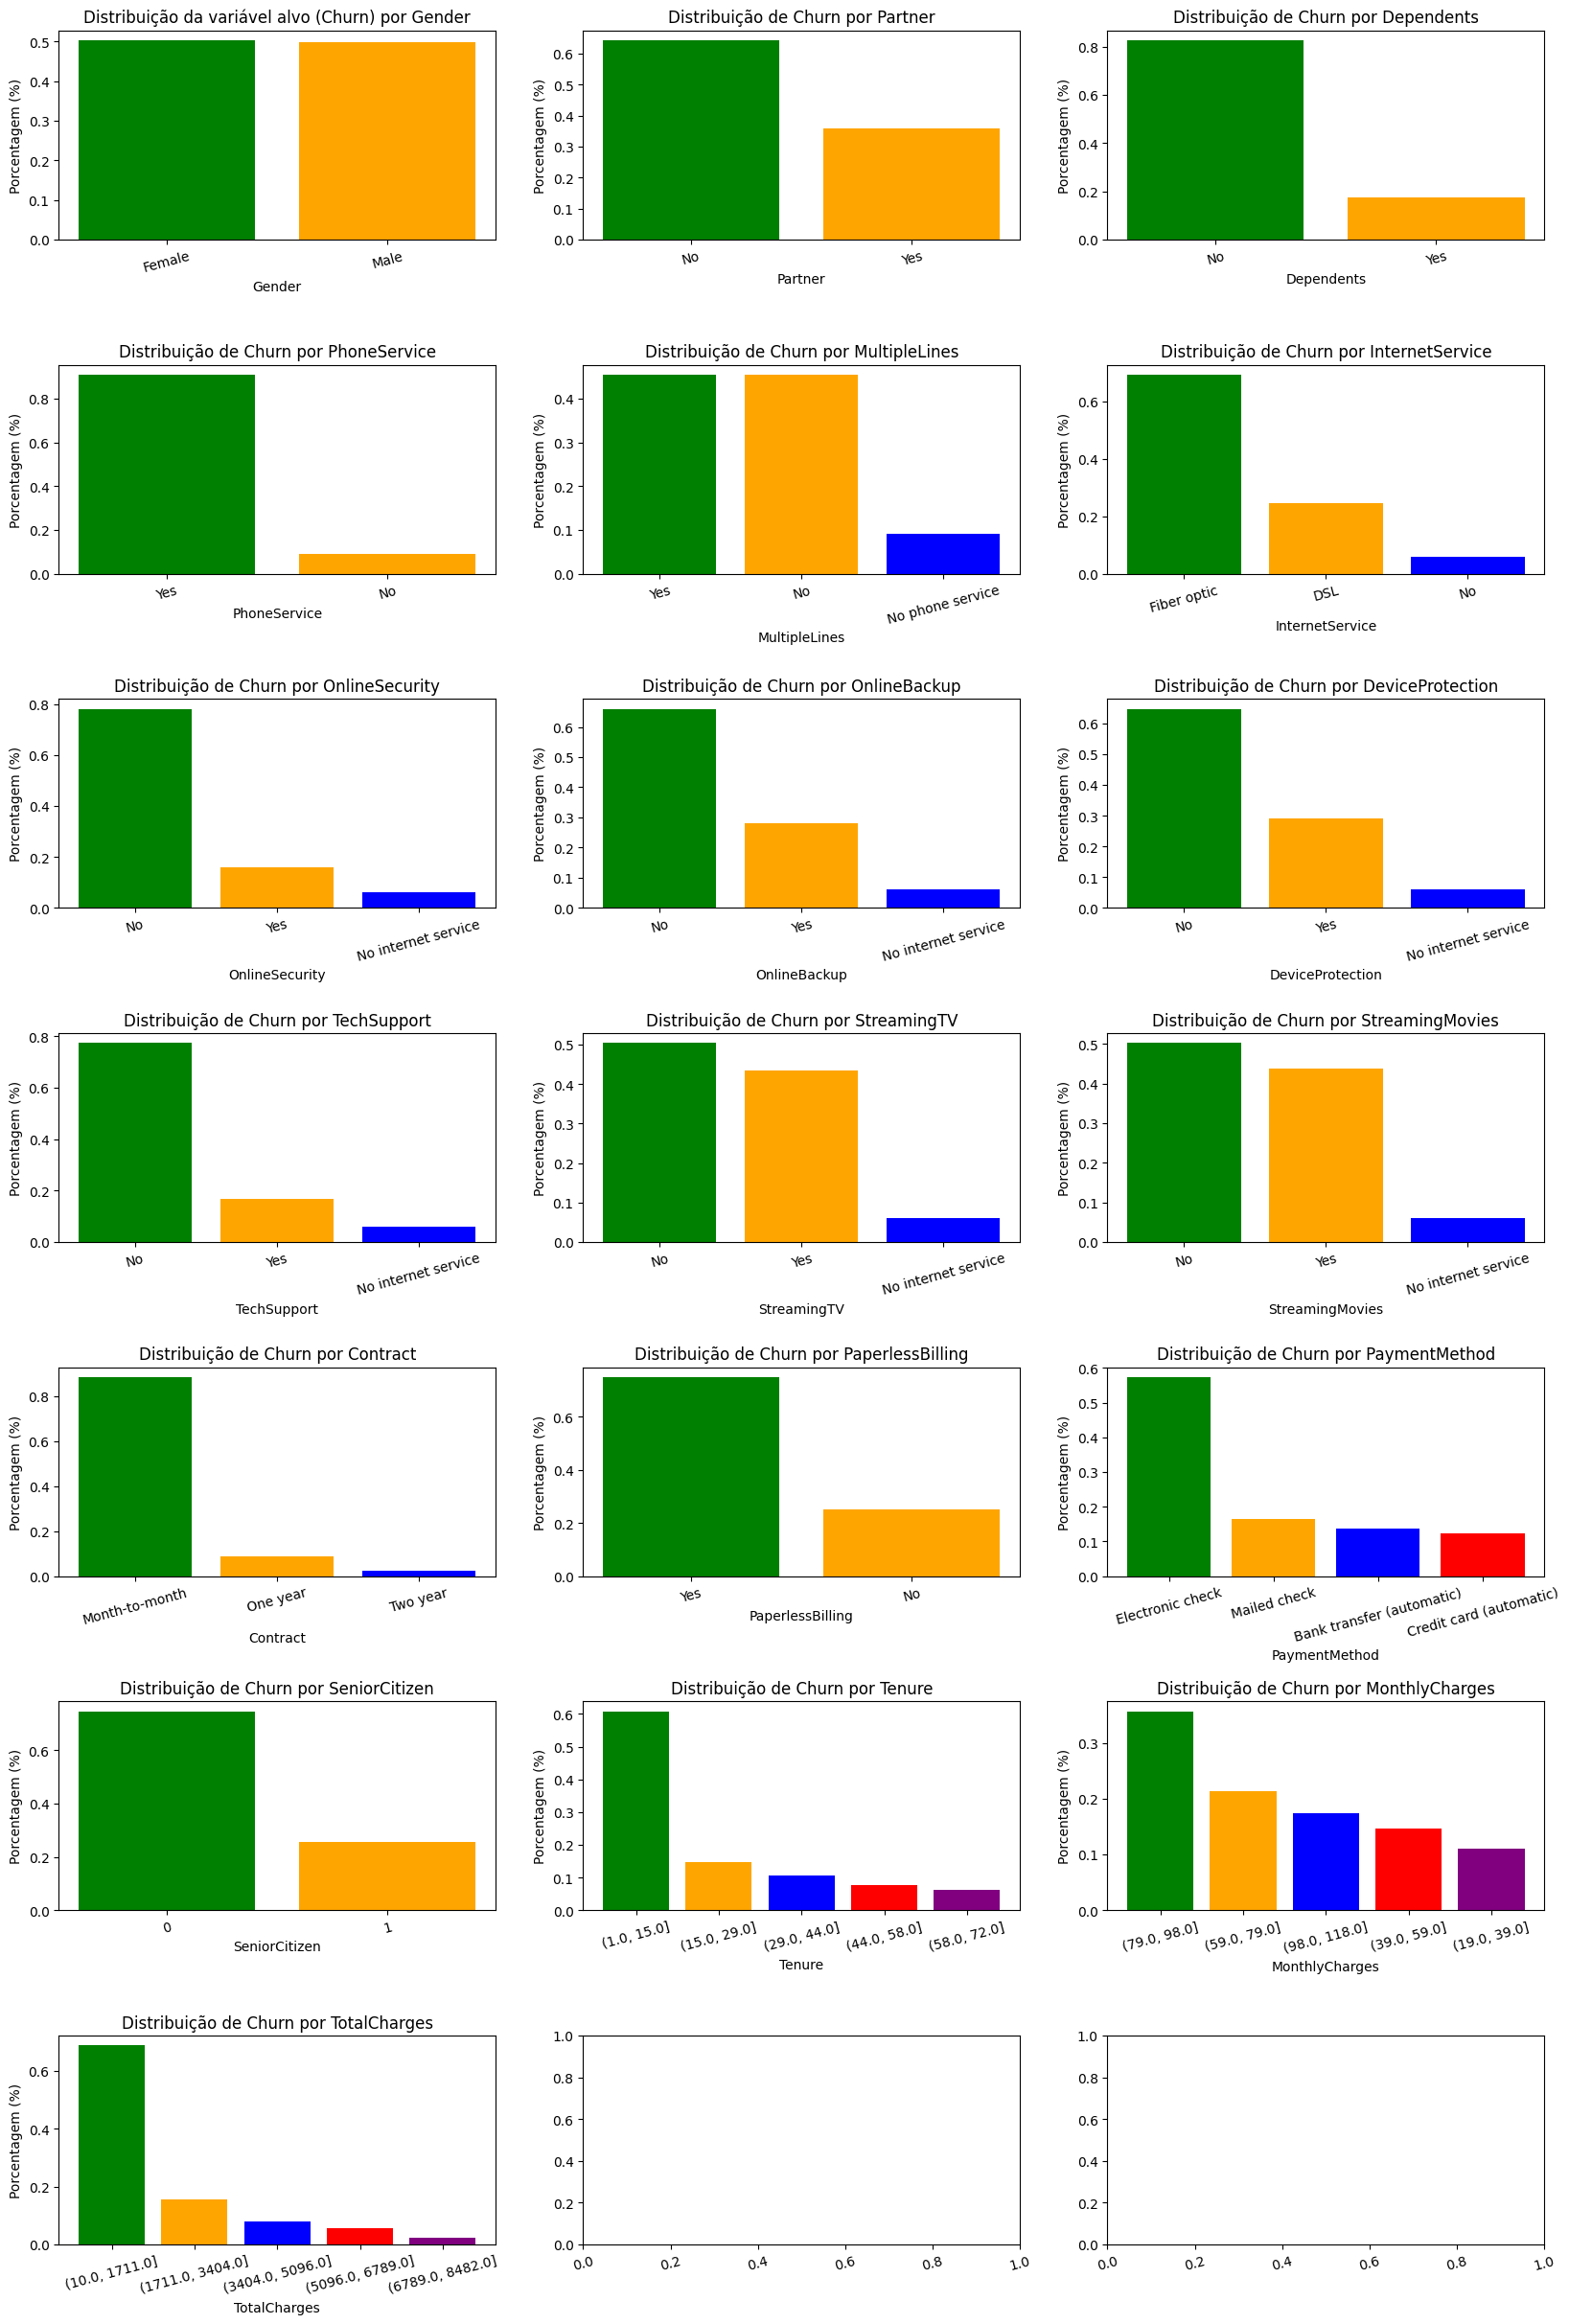

In [4]:
eda_df = df

#  Resumo estatístico das variáveis
print("Resumo estatístico para números:")
display(pd.DataFrame(eda_df.select_dtypes(include=['number']).describe()))
print("Resumo estatístico para literais:")
display(pd.DataFrame(eda_df.select_dtypes(exclude=['number']).describe()))

fig, axes = plt.subplots(7, 3, figsize=(20, 30))

data = eda_df[eda_df["Churn"] == 1]["gender"].value_counts(normalize=True)
axes[0, 0].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[0, 0].set_title("Distribuição da variável alvo (Churn) por Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["Partner"].value_counts(normalize=True)
axes[0, 1].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[0, 1].set_title("Distribuição de Churn por Partner")
axes[0, 1].set_xlabel("Partner")
axes[0, 1].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["Dependents"].value_counts(normalize=True)
axes[0, 2].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[0, 2].set_title("Distribuição de Churn por Dependents")
axes[0, 2].set_xlabel("Dependents")
axes[0, 2].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["PhoneService"].value_counts(normalize=True)
axes[1, 0].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[1, 0].set_title("Distribuição de Churn por PhoneService")
axes[1, 0].set_xlabel("PhoneService")
axes[1, 0].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["MultipleLines"].value_counts(normalize=True)
axes[1, 1].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[1, 1].set_title("Distribuição de Churn por MultipleLines")
axes[1, 1].set_xlabel("MultipleLines")
axes[1, 1].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["InternetService"].value_counts(normalize=True)
axes[1, 2].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[1, 2].set_title("Distribuição de Churn por InternetService")
axes[1, 2].set_xlabel("InternetService")
axes[1, 2].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["OnlineSecurity"].value_counts(normalize=True)
axes[2, 0].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[2, 0].set_title("Distribuição de Churn por OnlineSecurity")
axes[2, 0].set_xlabel("OnlineSecurity")
axes[2, 0].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["OnlineBackup"].value_counts(normalize=True)
axes[2, 1].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[2, 1].set_title("Distribuição de Churn por OnlineBackup")
axes[2, 1].set_xlabel("OnlineBackup")
axes[2, 1].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["DeviceProtection"].value_counts(normalize=True)
axes[2, 2].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[2, 2].set_title("Distribuição de Churn por DeviceProtection")
axes[2, 2].set_xlabel("DeviceProtection")
axes[2, 2].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["TechSupport"].value_counts(normalize=True)
axes[3, 0].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[3, 0].set_title("Distribuição de Churn por TechSupport")
axes[3, 0].set_xlabel("TechSupport")
axes[3, 0].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["StreamingTV"].value_counts(normalize=True)
axes[3, 1].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[3, 1].set_title("Distribuição de Churn por StreamingTV")
axes[3, 1].set_xlabel("StreamingTV")
axes[3, 1].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["StreamingMovies"].value_counts(normalize=True)
axes[3, 2].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[3, 2].set_title("Distribuição de Churn por StreamingMovies")
axes[3, 2].set_xlabel("StreamingMovies")
axes[3, 2].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["Contract"].value_counts(normalize=True)
axes[4, 0].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[4, 0].set_title("Distribuição de Churn por Contract")
axes[4, 0].set_xlabel("Contract")
axes[4, 0].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["PaperlessBilling"].value_counts(normalize=True)
axes[4, 1].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[4, 1].set_title("Distribuição de Churn por PaperlessBilling")
axes[4, 1].set_xlabel("PaperlessBilling")
axes[4, 1].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["PaymentMethod"].value_counts(normalize=True)
axes[4, 2].bar(data.index, data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[4, 2].set_title("Distribuição de Churn por PaymentMethod")
axes[4, 2].set_xlabel("PaymentMethod")
axes[4, 2].set_ylabel("Porcentagem (%)")

data = eda_df[eda_df["Churn"] == 1]["SeniorCitizen"].value_counts(normalize=True)
axes[5, 0].bar(data.index.astype(str), data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[5, 0].set_title("Distribuição de Churn por SeniorCitizen")
axes[5, 0].set_xlabel("SeniorCitizen")
axes[5, 0].set_ylabel("Porcentagem (%)")

data = pd.cut(eda_df[eda_df["Churn"] == 1]["tenure"], bins=5, precision=0).value_counts(normalize=True)
axes[5, 1].bar(data.index.astype(str), data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[5, 1].set_title("Distribuição de Churn por Tenure")
axes[5, 1].set_xlabel("Tenure")
axes[5, 1].set_ylabel("Porcentagem (%)")

data = pd.cut(eda_df[eda_df["Churn"] == 1]["MonthlyCharges"], bins=5, precision=0).value_counts(normalize=True)
axes[5, 2].bar(data.index.astype(str), data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[5, 2].set_title("Distribuição de Churn por MonthlyCharges")
axes[5, 2].set_xlabel("MonthlyCharges")
axes[5, 2].set_ylabel("Porcentagem (%)")

data = pd.cut(eda_df[eda_df["Churn"] == 1]["TotalCharges"], bins=5, precision=0).value_counts(normalize=True)
axes[6, 0].bar(data.index.astype(str), data.values, color=["green", "orange", "blue", "red", "purple", "yellow"])
axes[6, 0].set_title("Distribuição de Churn por TotalCharges")
axes[6, 0].set_xlabel("TotalCharges")
axes[6, 0].set_ylabel("Porcentagem (%)")

# eda_df["tenure_category"] = pd.cut(eda_df["tenure"], bins=[0, 12, 24, 60, 120], labels=["0-1 ano", "1-2 anos", "2-5 anos", "5+ anos"])
# plt.figure(figsize=(8, 5))
# sns.countplot(x=eda_df["tenure_category"], hue=eda_df["Churn"])
# plt.title("Distribuição do Tempo de Cliente vs Churn")
# plt.xlabel("Tempo como Cliente")
# plt.ylabel("Contagem")
# plt.legend(title="Churn", labels=["Não", "Sim"])
# plt.show()

# eda_df["MonthlyCharges_category"] = pd.cut(eda_df["MonthlyCharges"], bins=5, labels=["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"])
# churn_counts = eda_df.groupby("MonthlyCharges_category", observed=True)["Churn"].value_counts(normalize=True).unstack()
# churn_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")
# plt.title("Porcentagem Acumulativa de Churn por Faixa de Pagamento")
# plt.xlabel("Faixa de Pagamento Mensal")
# plt.ylabel("Proporção de Churn")
# plt.legend(title="Churn", labels=["Não", "Sim"])
# plt.grid(axis="y", linestyle="--", alpha=0.7)

fig.subplots_adjust(hspace=0.6)
for ax in fig.get_axes():  # Percorre todos os subgráficos
    ax.tick_params(axis="x", rotation=15)
plt.show()

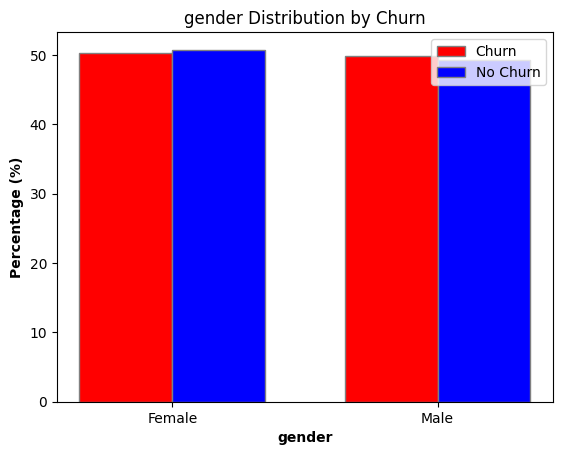

In [5]:
# Contagem de valores de gênero para churn positivo e negativo
positive_gender_counts = data_positive['gender'].value_counts()
negative_gender_counts = data_negative['gender'].value_counts()

# Calculando as porcentagens
total_positive = positive_gender_counts.sum()
total_negative = negative_gender_counts.sum()

positive_gender_percent = (positive_gender_counts / total_positive) * 100
negative_gender_percent = (negative_gender_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_gender_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_gender_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_gender_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('gender', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_gender_percent))], positive_gender_percent.index)
plt.title('gender Distribution by Churn')
plt.legend()
plt.show()

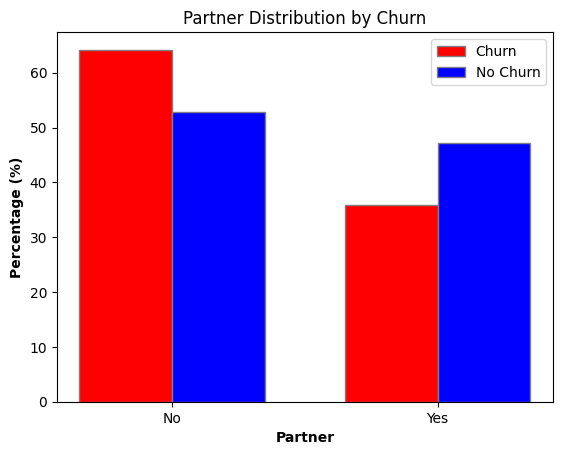

In [6]:
# Contagem de valores de gênero para churn positivo e negativo
positive_partner_counts = data_positive['Partner'].value_counts()
negative_partner_counts = data_negative['Partner'].value_counts()

# Calculando as porcentagens
total_positive = positive_partner_counts.sum()
total_negative = negative_partner_counts.sum()

positive_partner_percent = (positive_partner_counts / total_positive) * 100
negative_partner_percent = (negative_partner_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_partner_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_partner_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_partner_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_partner_percent))], positive_partner_percent.index)
plt.title('Partner Distribution by Churn')
plt.legend()
plt.show()

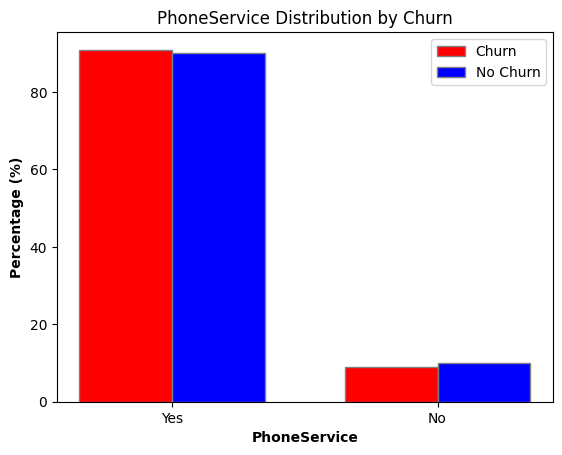

In [7]:
# Contagem de valores de gênero para churn positivo e negativo
positive_PhoneService_counts = data_positive['PhoneService'].value_counts()
negative_PhoneService_counts = data_negative['PhoneService'].value_counts()

# Calculando as porcentagens
total_positive = positive_PhoneService_counts.sum()
total_negative = negative_PhoneService_counts.sum()

positive_PhoneService_percent = (positive_PhoneService_counts / total_positive) * 100
negative_PhoneService_percent = (negative_PhoneService_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_PhoneService_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_PhoneService_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_PhoneService_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('PhoneService', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_PhoneService_percent))], positive_PhoneService_percent.index)
plt.title('PhoneService Distribution by Churn')
plt.legend()
plt.show()

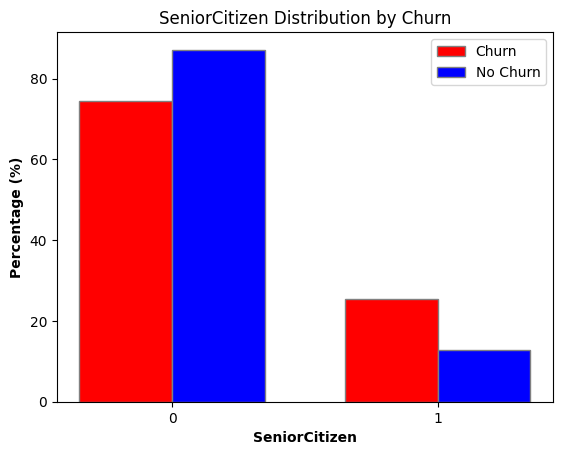

In [8]:
# Contagem de valores de gênero para churn positivo e negativo
positive_SeniorCitizen_counts = data_positive['SeniorCitizen'].value_counts()
negative_SeniorCitizen_counts = data_negative['SeniorCitizen'].value_counts()

# Calculando as porcentagens
total_positive = positive_SeniorCitizen_counts.sum()
total_negative = negative_SeniorCitizen_counts.sum()

positive_SeniorCitizen_percent = (positive_SeniorCitizen_counts / total_positive) * 100
negative_SeniorCitizen_percent = (negative_SeniorCitizen_counts / total_negative) * 100

# Definindo a posição das barras
bar_width = 0.35
r1 = np.arange(len(positive_SeniorCitizen_percent))
r2 = [x + bar_width for x in r1]

# Plotando os dados
plt.bar(r1, positive_SeniorCitizen_percent.values, color='red', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_SeniorCitizen_percent.values, color='blue', width=bar_width, edgecolor='grey', label='No Churn')

# Adicionando os rótulos e título
plt.xlabel('SeniorCitizen', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(positive_SeniorCitizen_percent))], positive_SeniorCitizen_percent.index)
plt.title('SeniorCitizen Distribution by Churn')
plt.legend()
plt.show()

# 3. Pré-processamento dos dados

In [70]:
# Corrige a remoção de duplicatas (atribui o resultado de volta ao DataFrame)
df = df.drop_duplicates(ignore_index=True)
df = df.fillna(0)
# df.dropna(ignore_index=True)  # opção alternativa, se necessário
df = pd.get_dummies(df, drop_first=True)
data = df
df_data = df.drop(columns='Churn')
df_target = df['Churn']

In [71]:
def k_fold_train_val_test(data, k=5, test_size=0.2, random_state=42):

    # Garante reprodutibilidade
    np.random.seed(random_state)
    
    # Número total de amostras
    n_samples = len(data)
    
    # Separação inicial entre conjunto de treinamento+validação e conjunto de teste
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Número de amostras para teste
    n_test = int(n_samples * test_size)
    
    # Índices para teste (fixos para todos os folds)
    test_indices = indices[:n_test]
    
    # Índices para treinamento + validação
    train_val_indices = indices[n_test:]
    
    # Aplicar k-fold nos índices de treinamento + validação
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    # Lista para armazenar os índices de cada fold
    fold_indices = []
    
    # Iterar sobre os splits do k-fold
    for train_idx, val_idx in kf.split(train_val_indices):
        # Mapear os índices do split para os índices originais do dataset
        train_indices = train_val_indices[train_idx]
        val_indices = train_val_indices[val_idx]
        
        # Armazenar os índices deste fold
        fold_indices.append((train_indices, val_indices, test_indices))
    
    return fold_indices

folds = k_fold_train_val_test(data, k=5, test_size=0.25, random_state=42)

# Troque o valor de fold_order para 0, 1, 2, 3 ou 4 para escolher um dos folds
fold_order = 0 #
df_treino = data.iloc[folds[fold_order][0]]
df_test = data.iloc[folds[fold_order][1]]
df_validacao = data.iloc[folds[fold_order][2]]

In [ ]:
# VERIFICAR 001
# # Plotando a quantidade de dados de treino e teste.
# plt.bar(['Treino', 'Teste', 'Validação'], [df_treino.shape[0], df_test.shape[0], df_validacao.shape[0]])
# plt.show()

# plt.bar(df_treino['Churn'].value_counts().index, df_treino['Churn'].value_counts(), color=['blue', 'red'])
# plt.xticks([0, 1])
# plt.show()

# plt.bar(df_test['Churn'].value_counts().index, df_test['Churn'].value_counts(), color=['blue', 'red'])
# plt.xticks([0, 1])
# plt.show()

# plt.bar(df_validacao['Churn'].value_counts().index, df_validacao['Churn'].value_counts(), color=['blue', 'red'])
# plt.xticks([0, 1])
# plt.show()

# # Separando os dados de entrada e saída.
X_treino = df_treino.drop(columns=['Churn'])
y_treino = df_treino['Churn']

X_test = df_test.drop(columns=['Churn'])
y_test = df_test['Churn']

X_val = df_validacao.drop(columns=['Churn'])
y_val = df_validacao['Churn']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_treino)
y_train = y_treino

X_val = scaler.transform(X_val)
y_val = y_val

X_test = scaler.transform(X_test)
y_test = y_test

# 4. Otimização de Hiperparâmetros com Optuna

### 4.1 MLP

Para o MLP variamos os seguintes hiperparametros:

Numero de layers --> (1 até 3)  
Numero de neuronios em cada layer --> (16 até 128)  
Dropout --> (0 até 0.5)  
Função de ativação --> (Sigmoid ou ReLu)  
Learning Rate --> (10**(-5) até 10**(-1))  
Batch Size --> (16 até 128)  

### 4.2 Random Forest

Para o Random Forest variamos os seguintes hiperparametros:

Max Depth --> (2 até 16)  
Min samples Split --> (2 até 20)  
Min Samples Split --> (1 até 10)  
Total Estimators --> (50 até 200)  

### 4.3 Gradient Boost

Para o Gradient Boost variamos os seguintes hiperparametros:

Numero de estimadores --> (50 até 500)  
Learning Rate --> (10^-3 até 0.3)  
Max depth --> (1 até 10)  
Min Samples Split --> (2 até 20)  
Min Samples Leaf --> (1 até 10)  
Subsample --> (0.3 até 1)  
Max Features --> (sqrt ou log2 ou None)  

### 4.4 Transformers (STab)

Para os Transformers variamos os seguintes hiperparametros:

Numero de Heads --> (2 ou 4 ou 8)  
Tamanho das Heads --> (32 ou 64 ou 128)  
ff Dim --> (64 ou 128 ou 256)  
Numero de blocos de trasformers --> (1 até 4)  
Unidades de MLP --> (32 ou 64 e 32 ou 128 e 64)  
Dropout --> (0.1 até 0.5)  
Dropout no MLP --> (0.1 até 0.5)  
Learning Rate --> (10^-5 até 10^-1)  
Batch Size --> (32 ou 64 ou 128)  


### 4.5 KAN

Para o KAN variamos os seguintes hiperparametros:

### 4.6 Tab KAN

Para o TabKANet variamos os seguintes hiperparametros:

Numero de Heads --> (2 ou 4 ou 8)  
Tamanho das Heads --> (32 ou 64 ou 128)  
ff Dim --> (64 ou 128 ou 256)  
Numero de blocos de trasformers --> (1 até 4)  
Unidades de MLP --> (32 ou 64 e 32 ou 128 e 64)  
Dropout --> (0.1 até 0.5)  
Dropout no MLP --> (0.1 até 0.5)  
Learning Rate --> (10^-5 até 10^-1)  
Batch Size --> (32 ou 64 ou 128)  

# 5. Modelos

### Utils

In [ ]:
#########################################
# FUNÇÕES DE MÉTRICAS
#########################################
def compute_auc(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    return auc(fpr, tpr)

def compute_ks(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    return max(abs(tpr - fpr))

def compute_confusion(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

def compute_recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

def compute_precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def compute_fmeasure(precision, recall):
    if (precision + recall) == 0:
        return 0
    else:
        return 2 * precision * recall / (precision + recall)

def compute_mse(y_true, y_pred_prob):
    return mean_squared_error(y_true, y_pred_prob)

In [74]:
# Funçoes para gerar os as curvas ROC e KS

def plot_ks_statistic(y_true, y_proba, title='Gráfico KS'):
    """
    Plota o gráfico KS baseado nos rótulos reais (y_true) e nas probabilidades previstas (y_proba).
    """
    # Garante que os inputs sejam arrays numpy
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)

    
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    # Calcula o valor KS (diferença máxima entre TPR e FPR)
    ks_value = np.max(tpr - fpr)
    ks_index = np.argmax(tpr - fpr)

    # Cria o eixo X representando o percentil da população (aproximado)
    population_percentile = np.linspace(0, 1, len(tpr))
    x_ks_point = population_percentile[ks_index]

    plt.figure(figsize=(8, 6))
    plt.plot(population_percentile, tpr, label='TPR (Acum. Positivos)', color='blue')
    plt.plot(population_percentile, fpr, label='FPR (Acum. Negativos)', color='red', linestyle='--')
    plt.plot([x_ks_point, x_ks_point], [fpr[ks_index], tpr[ks_index]],
             color='green', linestyle=':', linewidth=2,
             label=f'KS = {ks_value:.4f} em ~{x_ks_point*100:.1f}% da população')
    plt.xlabel('Percentil da População (Ordenada por Score)')
    plt.ylabel('Taxa Acumulada')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()


# Exemplo de geração do gráfico ROC com dados de um fold de validação

def plot_roc_curve(y_true, y_proba, title='Curva ROC'):
    """
    Plota a curva ROC baseada nos rótulos reais e nas probabilidades previstas.
    """
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(title)
    plt.legend(loc="lower right")

## 5.1 MLP

### Melhor modelo encontrado com base nos testes

In [75]:
input_dim = X_train.shape[1]
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])



early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
132/132 [==============================] - 1s 3ms/step - loss: 0.5011 - accuracy: 0.7489 - precision: 0.5604 - recall: 0.3377 - val_loss: 0.4174 - val_accuracy: 0.8010 - val_precision: 0.6216 - val_recall: 0.5561
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7824 - precision: 0.6204 - recall: 0.5061 - val_loss: 0.4106 - val_accuracy: 0.8090 - val_precision: 0.6677 - val_recall: 0.4955
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7840 - precision: 0.6271 - recall: 0.5000 - val_loss: 0.4048 - val_accuracy: 0.8130 - val_precision: 0.6569 - val_recall: 0.5538
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.7938 - precision: 0.6556 - recall: 0.5026 - val_loss: 0.4061 - val_accuracy: 0.8090 - val_precision: 0.6377 - val_recall: 0.5762
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7992

### Valores e graficos de metricas estatistica do modelo


Resultados no Teste:
- Acurácia: 0.7958
- Precisão: 0.6250
- Recall: 0.5166


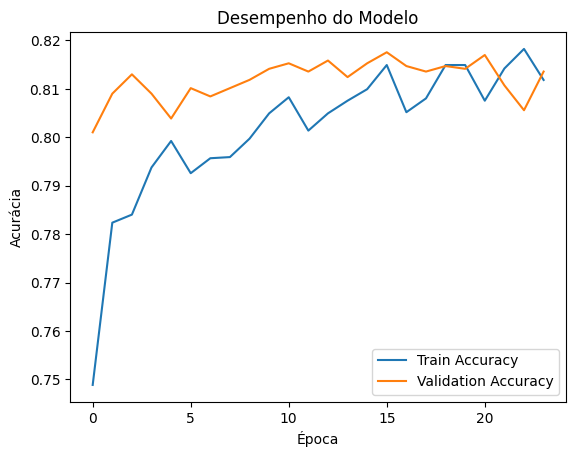

33/33 [==============================] - 0s 937us/step


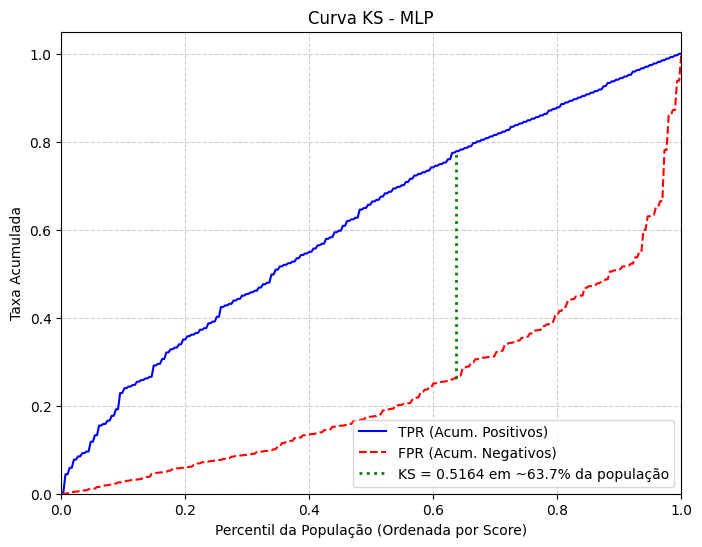

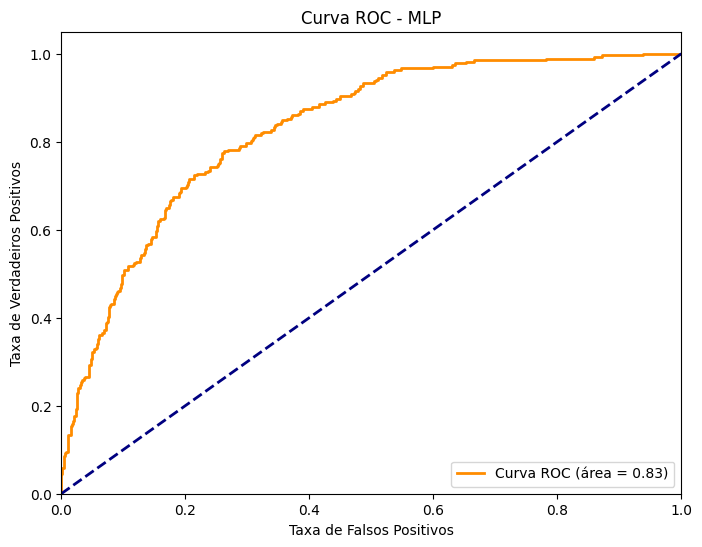

In [76]:
# Avaliação do modelo no conjunto de teste
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'''
Resultados no Teste:
- Acurácia: {test_results[1]:.4f}
- Precisão: {test_results[2]:.4f}
- Recall: {test_results[3]:.4f}''')

# 6. Visualização do Treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Desempenho do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()
plt.show()

# Plotando a curva ROC
y_pred_MLP = model.predict(X_test).ravel()

plot_ks_statistic(y_test, y_pred_MLP, title='Curva KS - MLP')

plot_roc_curve(y_test, y_pred_MLP, title='Curva ROC - MLP')


### Dados gerados

In [77]:
metrics = pd.read_excel('MLP/optuna_results_MLP.xlsx')
metrics.head()


,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout_rate,params_learning_rate,params_n_layers,params_units_0,params_units_1,params_units_2,state,val_accuracy,val_precision,val_recall,val_f1_score,val_auc_roc,param_observado
0,0,0.441566,2025-02-23 21:53:42.233,2025-02-23 21:53:53.133,0.000126,128,0.1,0.000117,3,128,64.0,16.0,COMPLETE,0.789892,0.637647,0.556468,0.594298,0.833463,Minimaze Loss
1,1,0.438416,2025-02-23 21:53:53.141,2025-02-23 21:54:08.080,0.000173,32,0.2,0.000166,2,112,80.0,NaN,COMPLETE,0.792731,0.656410,0.525667,0.583808,0.833727,Minimaze Loss
2,2,0.446357,2025-02-23 21:54:08.090,2025-02-23 21:54:15.814,0.000089,128,0.1,0.000195,3,96,128.0,32.0,COMPLETE,0.789892,0.645161,0.533881,0.584270,0.829385,Minimaze Loss
3,3,0.445582,2025-02-23 21:54:15.822,2025-02-23 21:54:26.482,0.000123,128,0.1,0.000174,3,80,128.0,112.0,COMPLETE,0.787053,0.634615,0.542094,0.584718,0.830151,Minimaze Loss
4,4,0.446058,2025-02-23 21:54:26.490,2025-02-23 21:54:37.020,0.000122,112,0.0,0.000162,3,48,48.0,16.0,COMPLETE,0.793867,0.665775,0.511294,0.578397,0.828616,Minimaze Loss


## 5.2 Random Forest

### Melhor modelo encontrado com base nos testes

In [78]:


# Create the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=8,       # Maximum depth of each tree
    min_samples_split=5, # Minimum samples required to split
    min_samples_leaf=2,  # Minimum samples required at a leaf
    random_state=42,     # For reproducibility
    n_jobs=-1            # Use all available cores
)

# Train the model on training data
rf_model.fit(X_train, y_train)

# For tracking metrics during training (to simulate history)
# We'll use subsets of trees to simulate "epochs"
train_accuracies = []
val_accuracies = []

# Simulate "epochs" with different numbers of trees
tree_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for n_trees in tree_counts:
    # Create a temporary model with subset of trees
    temp_model = RandomForestClassifier(
        n_estimators=n_trees,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    # Train on training data
    temp_model.fit(X_train, y_train)
    
    # Calculate accuracies
    train_pred = temp_model.predict(X_train)
    val_pred = temp_model.predict(X_val)
    
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)




    

### Calculo das features mais importantes da Random Forest

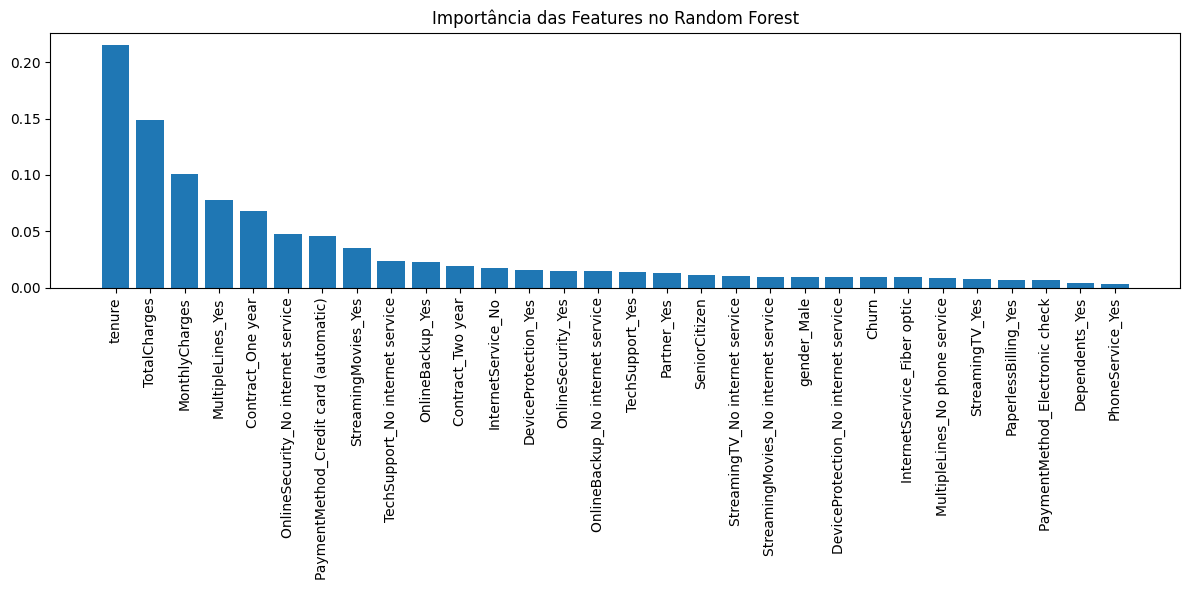

In [79]:

# Additional feature importance visualization (unique to Random Forest)
if hasattr(X_train, 'columns'):  # If X_train is a pandas DataFrame
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
feature_names = df_treino.columns
# Get and sort feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title('Importância das Features no Random Forest')
plt.tight_layout()
plt.show()

### Valores e graficos de metricas estatistica do modelo


Resultados no Teste:
- Acurácia: 0.7958
- Precisão: 0.6250
- Recall: 0.5166


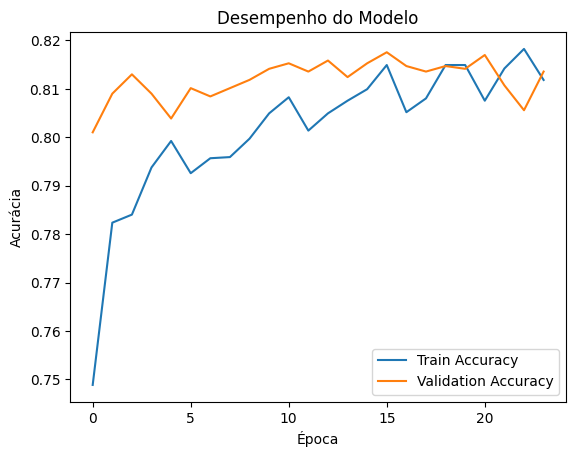

33/33 [==============================] - 0s 1ms/step


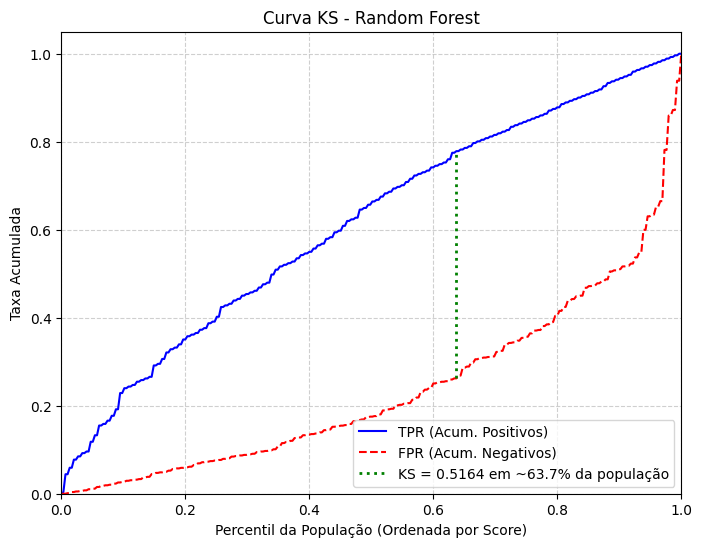

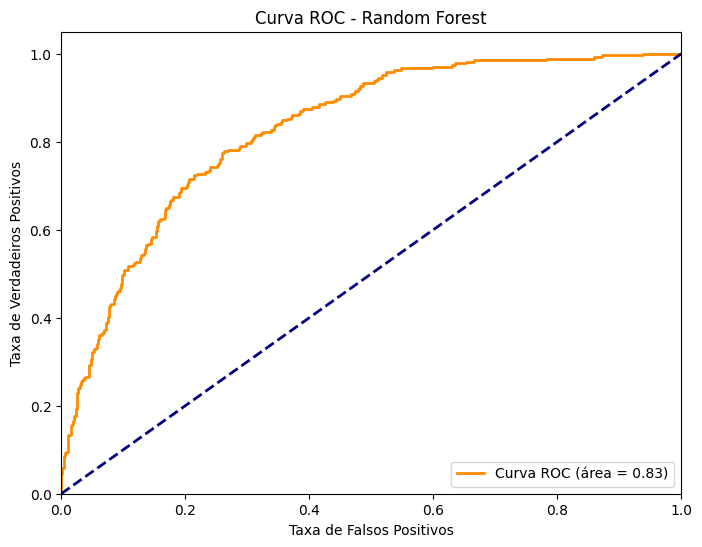

In [80]:
# Avaliação do modelo no conjunto de teste
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'''
Resultados no Teste:
- Acurácia: {test_results[1]:.4f}
- Precisão: {test_results[2]:.4f}
- Recall: {test_results[3]:.4f}''')

# 6. Visualização do Treinamento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Desempenho do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()
plt.show()

# Plotando a curva ROC
y_pred_rf = model.predict(X_test).ravel()

plot_ks_statistic(y_test, y_pred_rf, title='Curva KS - Random Forest')
plot_roc_curve(y_test, y_pred_rf, title='Curva ROC - Random Forest')


## 5.3 Gradient Boost

### Melhor modelo encontrado com base nos dados gerados

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold as SKFold

kf = SKFold(n_splits=5, shuffle=True, random_state=50)

model = GradientBoostingClassifier(
        n_estimators=484,
        learning_rate=0.009436,
        max_depth=1,
        min_samples_split=15,
        min_samples_leaf=4,
        subsample=0.334671,
        max_features='sqrt',
        random_state=50
    )
    
    # Inicializa listas para armazenar as métricas de cada fold
train_accuracies = []
val_accuracies = []
train_ks_values = []
val_ks_values = []
# Variáveis para guardar os dados do fold com maior KS na validação
max_val_ks = -1.0
best_y_val_for_ks_plot = None
best_y_proba_for_ks_plot = None
best_fold_num_for_ks_plot = 0
    
for train_index, val_index in kf.split(df_data, df_target):
    X_train, X_val = df_data.iloc[train_index], df_data.iloc[val_index]
    y_train, y_val = df_target.iloc[train_index], df_target.iloc[val_index]
    
    model.fit(X_train, y_train)
    
    # Previsões e probabilidades
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]
    
    # Cálculo das acurácias
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    # Cálculo do KS (diferença máxima entre TPR e FPR)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
    train_ks = max(np.abs(tpr_train - fpr_train))
    val_ks = max(np.abs(tpr_val - fpr_val))
    
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_ks_values.append(train_ks)
    val_ks_values.append(val_ks)

    roc_auc = auc(fpr, tpr)



    # --- Salva os dados se este fold tiver o maior KS de validação até agora ---
    if val_ks > max_val_ks:
        max_val_ks = val_ks
        # Salva cópias dos arrays para usar depois do loop
        best_y_val_for_ks_plot = y_val.copy()
        best_y_proba_for_ks_plot = y_val_proba.copy()
        best_fold_num_for_ks_plot = len(train_accuracies) - 1


# Cálculo das métricas médias nos folds
mean_train_acc = np.mean(train_accuracies)
mean_val_acc = np.mean(val_accuracies)
mean_train_ks = np.mean(train_ks_values)
mean_val_ks = np.mean(val_ks_values)

mean_train_acc, mean_val_acc, mean_train_ks, mean_val_ks

(0.7843143189513093,
 0.7827811994241074,
 0.5368041849123366,
 0.5379730295128389)

### Valores e graficos de metricas estatistica do modelo

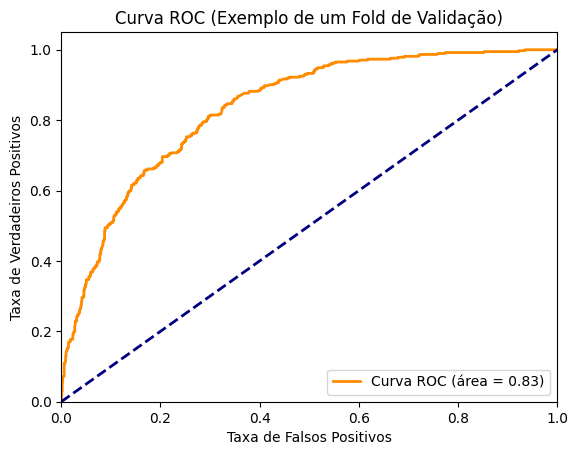

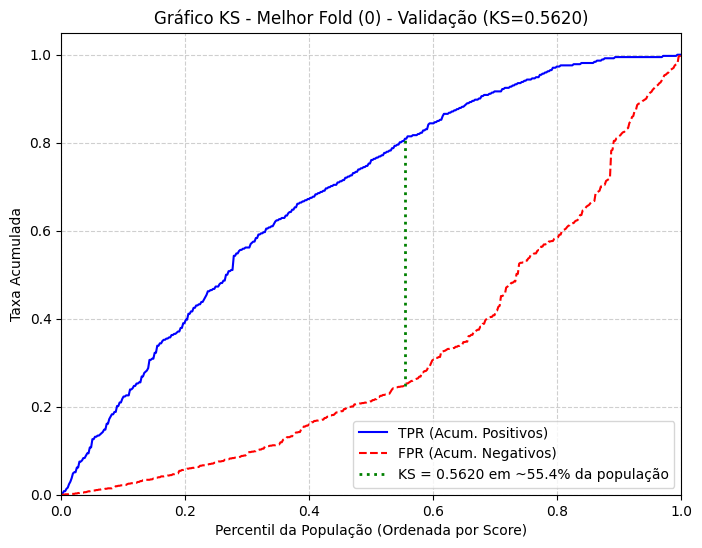

In [82]:
def plot_ks_statistic(y_true, y_proba, title='Gráfico KS'):

    # Garante que os inputs sejam arrays numpy
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)

    # Calcula FPR, TPR (necessários para o KS)
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)

    # Calcula o valor KS (diferença máxima entre TPR e FPR)
    ks_value = np.max(tpr - fpr)
    ks_index = np.argmax(tpr - fpr)

    # Cria o eixo X representando o percentil da população (aproximado)
    population_percentile = np.linspace(0, 1, len(tpr))
    x_ks_point = population_percentile[ks_index]


    plt.figure(figsize=(8, 6))


    plt.plot(population_percentile, tpr, label='TPR (Acum. Positivos)', color='blue')
    plt.plot(population_percentile, fpr, label='FPR (Acum. Negativos)', color='red', linestyle='--')


    plt.plot([x_ks_point, x_ks_point], [fpr[ks_index], tpr[ks_index]],
             color='green', linestyle=':', linewidth=2,
             label=f'KS = {ks_value:.4f} em ~{x_ks_point*100:.1f}% da população')

    plt.xlabel('Percentil da População (Ordenada por Score)')
    plt.ylabel('Taxa Acumulada')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Exibe o gráfico
    plt.show()



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC (Exemplo de um Fold de Validação)')
plt.legend(loc="lower right")
plt.show()

# Supondo que você tenha as probabilidades de previsão para um dos folds de validação (y_val_proba)
# e os rótulos verdadeiros correspondentes (y_val)

# Exemplo: Usando os resultados do último fold
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)


if best_y_val_for_ks_plot is not None and best_y_proba_for_ks_plot is not None:
    plot_ks_statistic(
        best_y_val_for_ks_plot,
        best_y_proba_for_ks_plot,
        title=f'Gráfico KS - Melhor Fold ({best_fold_num_for_ks_plot}) - Validação (KS={max_val_ks:.4f})'
    )
else:
    print("Não foi possível gerar o gráfico KS (nenhum dado de validação foi salvo).")





## 5.4 Transformers (STab)

### Melhor modelo encontrado com base nos testes

In [83]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Atenção e normalização
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs  # Conexão residual

    # Feed-forward e normalização
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    # Utiliza a dimensão estática para definir o número de filtros
    out_dim = tf.keras.backend.int_shape(inputs)[-1]
    x = layers.Conv1D(filters=out_dim, kernel_size=1)(x)
    return x + res

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, learning_rate=1e-3):
    """Cria um modelo Keras com blocos Transformer para classificação."""
    inputs = Input(shape=input_shape)
    x = inputs

    # Opcional: camada densa inicial para projeção das features
    # x = layers.Dense(head_size * num_heads)(x)

    # Cria blocos Transformer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Pooling para reduzir a dimensionalidade antes do classificador
    x = layers.GlobalAveragePooling1D()(x)  # Usa o padrão 'channels_last'

    # Camadas MLP (classificador) no final
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    # Camada de saída para classificação binária
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss=losses.BinaryCrossentropy(),
    )
    return model


In [84]:
N_SPLITS = 5
kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=50)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='max', restore_best_weights=True)

for fold, (train_index, val_index) in enumerate(kf.split(df_data, df_target)):
    print(f"\n--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = df_data.iloc[train_index], df_data.iloc[val_index]
    y_train, y_val = df_target.iloc[train_index], df_target.iloc[val_index]

    # Escalonamento dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Ajuste de dimensão para Keras (adiciona dimensão de 'sequência' de tamanho 1)
    X_train_reshaped = np.expand_dims(X_train_scaled, axis=1)
    X_val_reshaped = np.expand_dims(X_val_scaled, axis=1)

    input_shape = X_train_reshaped.shape[1:]

    # Limpa a sessão do Keras para evitar vazamento de memória
    backend.clear_session()

    # Constrói o modelo
    model = build_transformer_model(
        input_shape=input_shape,
        head_size=128,
        num_heads=4,
        ff_dim=64,
        num_transformer_blocks=1,
        mlp_units=[128, 64],
        dropout=0.351742,
        mlp_dropout=0.431477,
        learning_rate=0.001303
    )

    # Treinamento do modelo
    history = model.fit(
        X_train_reshaped, y_train,
        batch_size=64,
        epochs=100,
        validation_data=(X_val_reshaped, y_val),
        callbacks=[early_stopping],  # Correção: callbacks em formato de lista
        verbose=0
    )

y_val_proba_Transformer = model.predict(X_val_reshaped).ravel()


--- Fold 1/5 ---

--- Fold 2/5 ---

--- Fold 3/5 ---

--- Fold 4/5 ---

--- Fold 5/5 ---
44/44 [==============================] - 0s 1ms/step


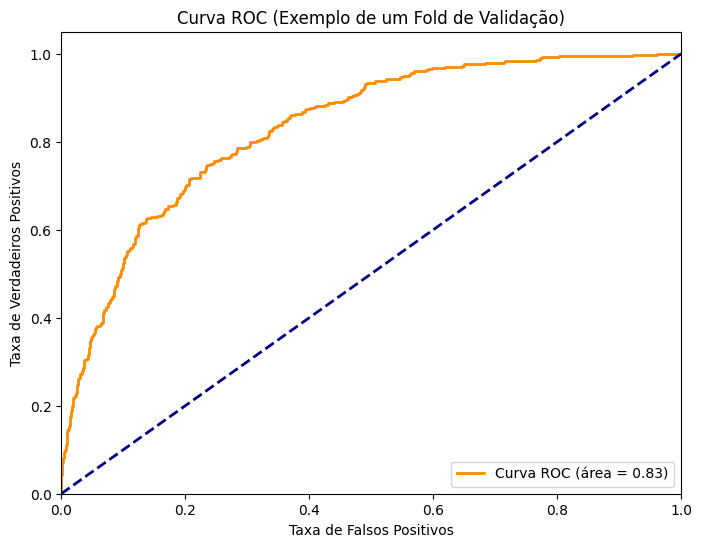

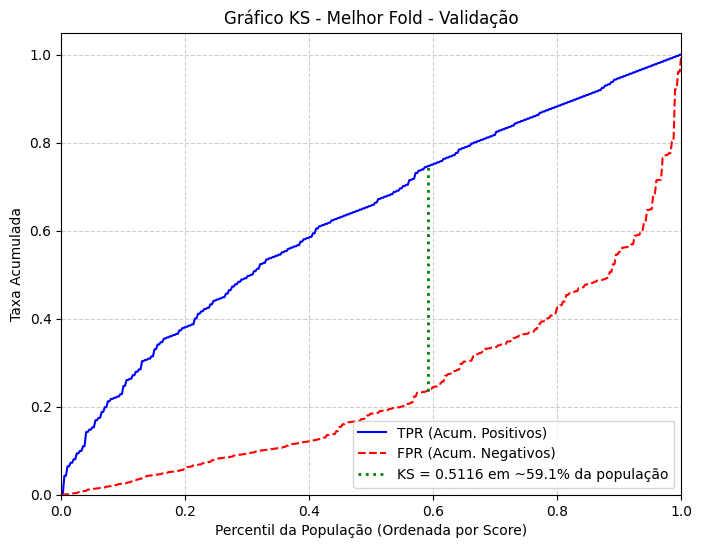

In [85]:
# Plot da curva ROC
plot_roc_curve(y_val, y_val_proba_Transformer,
               title='Curva ROC (Exemplo de um Fold de Validação)')

# Plot do gráfico KS
plot_ks_statistic(y_val, y_val_proba_Transformer,
                  title='Gráfico KS - Melhor Fold - Validação')

## 5.5 KAN (Kolmogorov Arnold Networks)

In [86]:
from Kantf import KAN

model = KAN([
    {'in_features': 784, 'out_features': 64, 'grid_size': 5, 'spline_order': 3, 'activation': 'silu'},
    {'in_features': 64, 'out_features': 10, 'grid_size': 5, 'spline_order': 3, 'activation': 'silu'}
])

ModuleNotFoundError: No module named 'Kantf'

In [ ]:
from KAN.tabkannet.models import modulo
from KAN.tabkannet.models.modulo import TabMLPNet
from tabkanet.models import TabMLPNet
from tabkanet.tools import seed_everything, get_dataset, get_data_loader, train
from tabkanet.metrics import f1_score_macro


# Função para calcular os bins
def get_quantile_bins(x_cont, n_bins=4):
    feature_dim = x_cont.shape[1]
    bins = torch.zeros(feature_dim, n_bins + 1)
    for i in range(feature_dim):
        # Converta a coluna específica para tensor e depois calcule os quantis
        quantiles = torch.quantile(torch.tensor(x_cont.iloc[:, i].values, dtype=torch.float32), torch.linspace(0, 1, n_bins + 1))
        bins[i] = quantiles
    return bins




# Definir features
continuous_features = list(X_train.columns)
categorical_features = []
target_name = "Churn"
task = "classification"

# Criar datasets
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

dataset_train, dataset_val, dataset_test = get_dataset(
    df_train, df_val, df_test, target_name, task, categorical_features, continuous_features
)

dataloader_train, dataloader_val, dataloader_test = get_data_loader(
    dataset_train, dataset_val, dataset_test, train_batch_size=32, inference_batch_size=32
)

# Calcular bins
bins = get_quantile_bins(X_train)

# Definir o modelo
model = TabMLPNet(
    output_dim=1,  
    vocabulary={},
    num_continuous_features=len(continuous_features),
    embedding_dim=16, 
    mlp_hidden_dims=[32],
    activation="sigmoid",
    ffn_dropout_rate=0.1,
    nhead=8,
    num_layers=3,
    dim_feedforward=128,
    attn_dropout_rate=0.1,
    learninable_noise=True,
    bins=bins
)

# Definir otimizador e loss
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-10, weight_decay=1e-2)
criterion = torch.nn.CrossEntropyLoss()

# Treinar o modelo
train_history, val_history, test_history = train(
    model, epochs=10, task=task, train_loader=dataloader_train, val_loader=dataloader_val,
    test_loader=dataloader_test, optimizer=optimizer, criterion=criterion,
    custom_metric=f1_score_macro, maximize=False, early_stopping_patience=5, gpu_num=0
)

ModuleNotFoundError: No module named 'KAN.tabkannet'

## 5.6 KAN Transformer (TabKANet)

In [ ]:
import optuna
import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

def preparar_dados(csv_path, target_col):
    # Carrega o CSV
    df = pd.read_csv(csv_path)

    # Separa features e alvo
    X = df.drop(columns=[target_col])
    y = df[target_col]
    y = y.map({"Yes": 1, "No": 0})

    # Identifica colunas categóricas e numéricas
    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

    # Divide 75% treino e 25% teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, stratify=y)

    # Pipeline de pré-processamento
    preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore"), cat_cols)
    ])

    # Ajusta com treino, transforma todos
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, y_train.values.astype(np.float32), y_test.values.astype(np.float32)

def compute_ks_tf(y_true, y_pred_prob):
    y_true = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_prob = tf.reshape(y_pred_prob, [-1])
    sorted_indices = tf.argsort(y_pred_prob, direction='DESCENDING')
    y_true_sorted = tf.gather(y_true, sorted_indices)
    total_positives = tf.reduce_sum(y_true)
    total_negatives = tf.cast(tf.size(y_true), tf.float32) - total_positives
    tpr = tf.cumsum(y_true_sorted) / (total_positives + 1e-7)
    fpr = tf.cumsum(1 - y_true_sorted) / (total_negatives + 1e-7)
    ks_stat = tf.reduce_max(tf.abs(tpr - fpr))
    return ks_stat

def buildTabKANet():
    model = None
    # ...
    return model

def testModelTABKANET(bestParams):
    print(f">>> Iniciando Teste.")
        
    params = bestParams

    # ! CRIE O MODELO NESSE PONTO
    model = buildTabKANet()

    val_accuracies = []
    val_ks_values = []
    val_auc_values = []
    val_precision_values = []
    val_recall_values = []
    val_f1_values = []
    val_losses = []
    
    print(f">>> Iniciando Último Treinamento.")

    fold = 0
    for train, val in kf.split(X_train, y_train):
        fold += 1
        print(f">>> Fold: #{fold}.")
        
        fX_train = X_train[train]
        fy_train = y_train[train]
        fx_val = X_train[val]
        fy_val = y_train[val]
        
        model.fit(
            fX_train, 
            fy_train, 
            batch_size=params["batch_size"], 
            epochs=params["epochs"], 
            verbose=2, 
            callbacks=[es],
            validation_data=(fx_val, fy_val),
            shuffle=True,
            use_multiprocessing=True
            )

        y_val_proba = model.predict(fx_val, verbose=0).ravel()
        y_val_pred = (y_val_proba > 0.5).astype("int32")

        fpr_val, tpr_val, _ = roc_curve(fy_val, y_val_proba)
        val_ks = max(np.abs(tpr_val - fpr_val))
        val_acc = accuracy_score(fy_val, y_val_pred) 
        val_auc = roc_auc_score(fy_val, y_val_proba)
        val_precision = precision_score(fy_val, y_val_pred, zero_division=0)          
        val_recall = recall_score(fy_val, y_val_pred, zero_division=0)         
        val_f1 = f1_score(fy_val, y_val_pred, zero_division=0) 
        val_loss = model.evaluate(fx_val, fy_val, verbose=0)[0]

        val_accuracies.append(val_acc)
        val_ks_values.append(val_ks)         
        val_auc_values.append(val_auc)      
        val_precision_values.append(val_precision)        
        val_recall_values.append(val_recall)        
        val_f1_values.append(val_f1)
        val_losses.append(val_loss)

    print(f">>> Terminando Último Treinamento.")

    mean_val_acc = np.mean(val_accuracies)
    mean_val_ks = np.mean(val_ks_values)
    mean_val_precision = np.mean(val_precision_values)
    mean_val_recall = np.mean(val_recall_values)
    mean_val_f1 = np.mean(val_f1_values)
    mean_val_auc = np.mean(val_auc_values)
    mean_val_loss = np.mean(val_losses)

    val_metrics = {
        'accuracy': mean_val_acc,
        'ks': mean_val_ks,
        'precision': mean_val_precision,
        'recall': mean_val_recall,
        'f1_score': mean_val_f1,
        'auc_roc': mean_val_auc,
        'loss': mean_val_loss
    }

    print(f">>> Terminando Teste.")
    return model, val_metrics, y_val_proba

ks_metric = tf.keras.metrics.MeanMetricWrapper(compute_ks_tf, name="ks")
kf = SKFold(n_splits=5, shuffle=True, random_state=50)
X_train, X_test, y_train, y_test = preparar_dados("data/customer_churn_telecom_services.csv", "Churn")
es = tf.keras.callbacks.EarlyStopping(monitor="val_ks", patience=10, restore_best_weights=True, mode="max", verbose=1)

# Avaliar o modelo
print("Avaliando o modelo...")
# ! RESULTADOS TEMPORÁRIOS, ALTERA-LOS QUANDO TIVER OS MELHORES PARAMETROS
mTABKANET, resultsTABKANET, y_val_probaTABKANET = testModelTABKANET(
    {
        'num_layers': 5, 
        'units': 464, 
        'dropout_rate': 0.0, 
        'learning_rate': 0.00011588355701582321, 
        'activation': 'relu', 
        'epochs': 270, 
        'batch_size': 16
    }
)
print("Resultados do melhor modelo:")
for key, value in resultsTABKANET.items():
    print(f"{key}: {value}")

# Plotar a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_val_probaTABKANET)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

# 6. Análise dos melhores modelos encontrados